# Boston House Price ML

In [78]:
# Import the pandas library as pd for data manipulation
import pandas as pd

# Import the numpy library as np for numerical operations
import numpy as np

# Import the seaborn library as sns for statistical data visualization
import seaborn as sns

# Import the matplotlib.pyplot module as plt for plotting graphs and visualizations
import matplotlib.pyplot as plt

# Import the warnings module to suppress any warnings that might occur during code execution
import warnings

# Suppress warnings to improve code readability
warnings.filterwarnings('ignore')

**Description of the dataset**

This dataset contains information on houses located in the Boston area, referring to the year 1970. Despite its age, it remains highly valuable for performing exploratory data analysis (EDA) exercises and for applying machine learning models.

In [79]:
df_house = pd.read_csv('data/BostonHousing.csv')

In [80]:
df_house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [81]:
df_house.shape

(506, 14)

The dataset consists of 506 records, each representing a suburb of Boston. Every record includes 14 features that describe the environmental and urban planning characteristics of the area. The features are as follows:

- **CRIM** (Crime Rate): Crime rate per person
- **ZN** (Residential Land): is the percentage of residential land divided into lots > 25,000 ft²
- **INDUS** (Industrial Land): is the percentage of non-residential area used for business
- **CHAS** (Charles River): 1 if bordering the Charles River, 0 otherwise (binary variable)
- **NOX** (Nitric Oxide): Concentration of nitrogen oxide (in ppm)
- **RM** (Rooms): Average number of rooms per dwelling
- **AGE** (Age of Homes): is the percentage of homes built before 1940
- **DIS** (Distance): average distance to five Boston job centers
- **RAD** (Highway Access): index of accessibility to radial highways
- **TAX** (Property Tax Rate): property tax rate (per $10,000)
- **PTRATIO** (Pupil-Teacher Ratio): pupil-teacher ratio in schools in the area
- **B** (Black Population): is the percentage of blacks in the area
- **LSTAT** (Lower Status): is the percentage of the population with low income
- **MEDV**: median home value in thousands of dollars

In [82]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


It's good to see that each feature doesn't have any null value.

# Data Exploration

array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'lstat'}>,
        <Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >]],
      dtype=object)

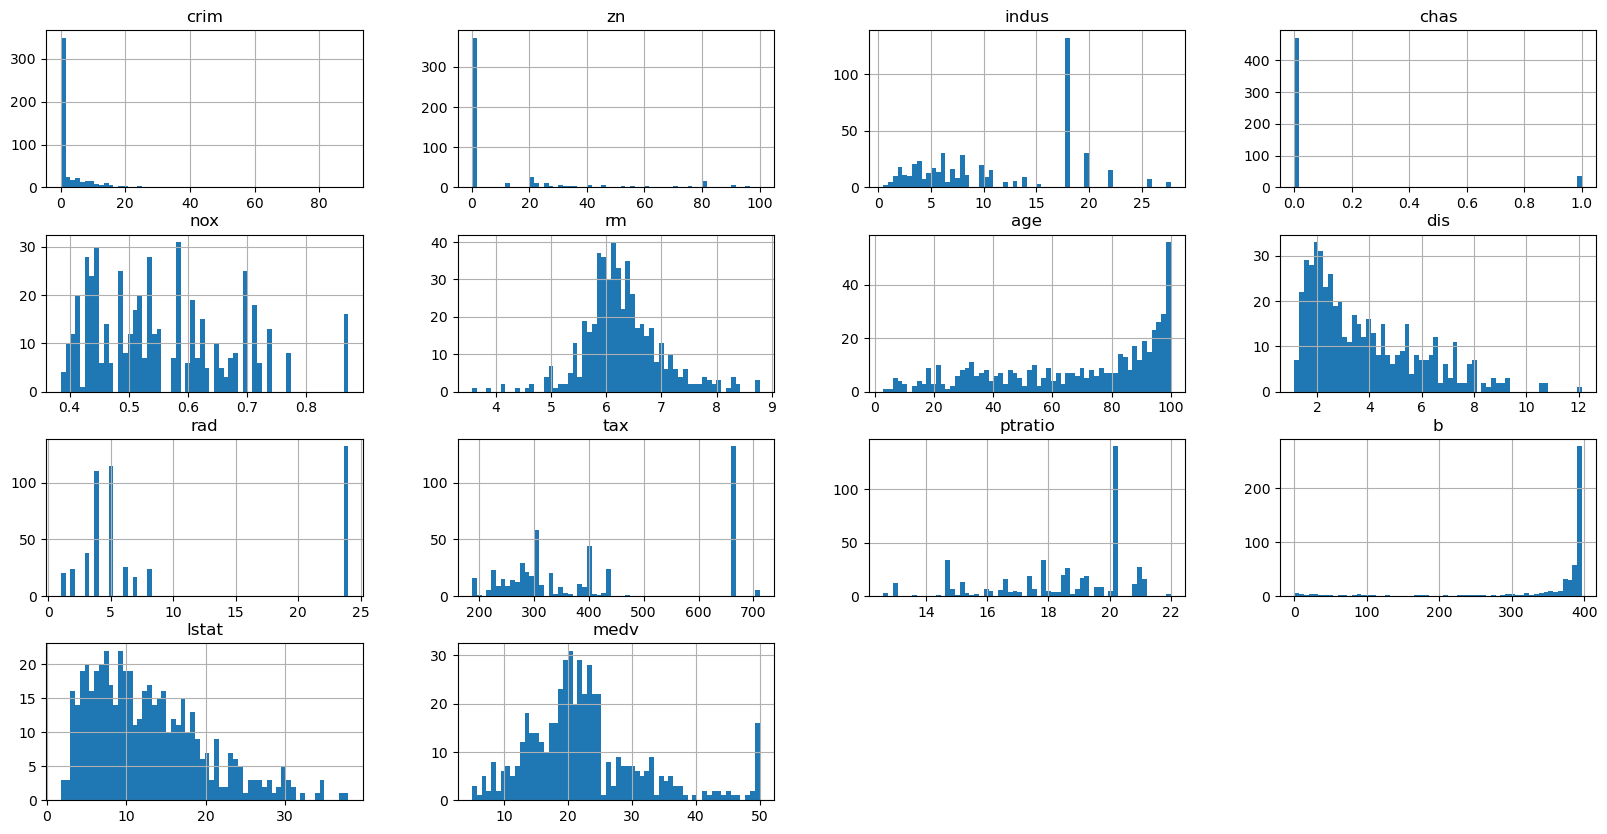

In [83]:
df_house.hist(figsize=(20, 10), bins=60)

Let us now create a correlation matrix to identify which of our features are related to each other. We will then analyze the most significant correlations to better understand their meaning within the urban and environmental context of the dataset.

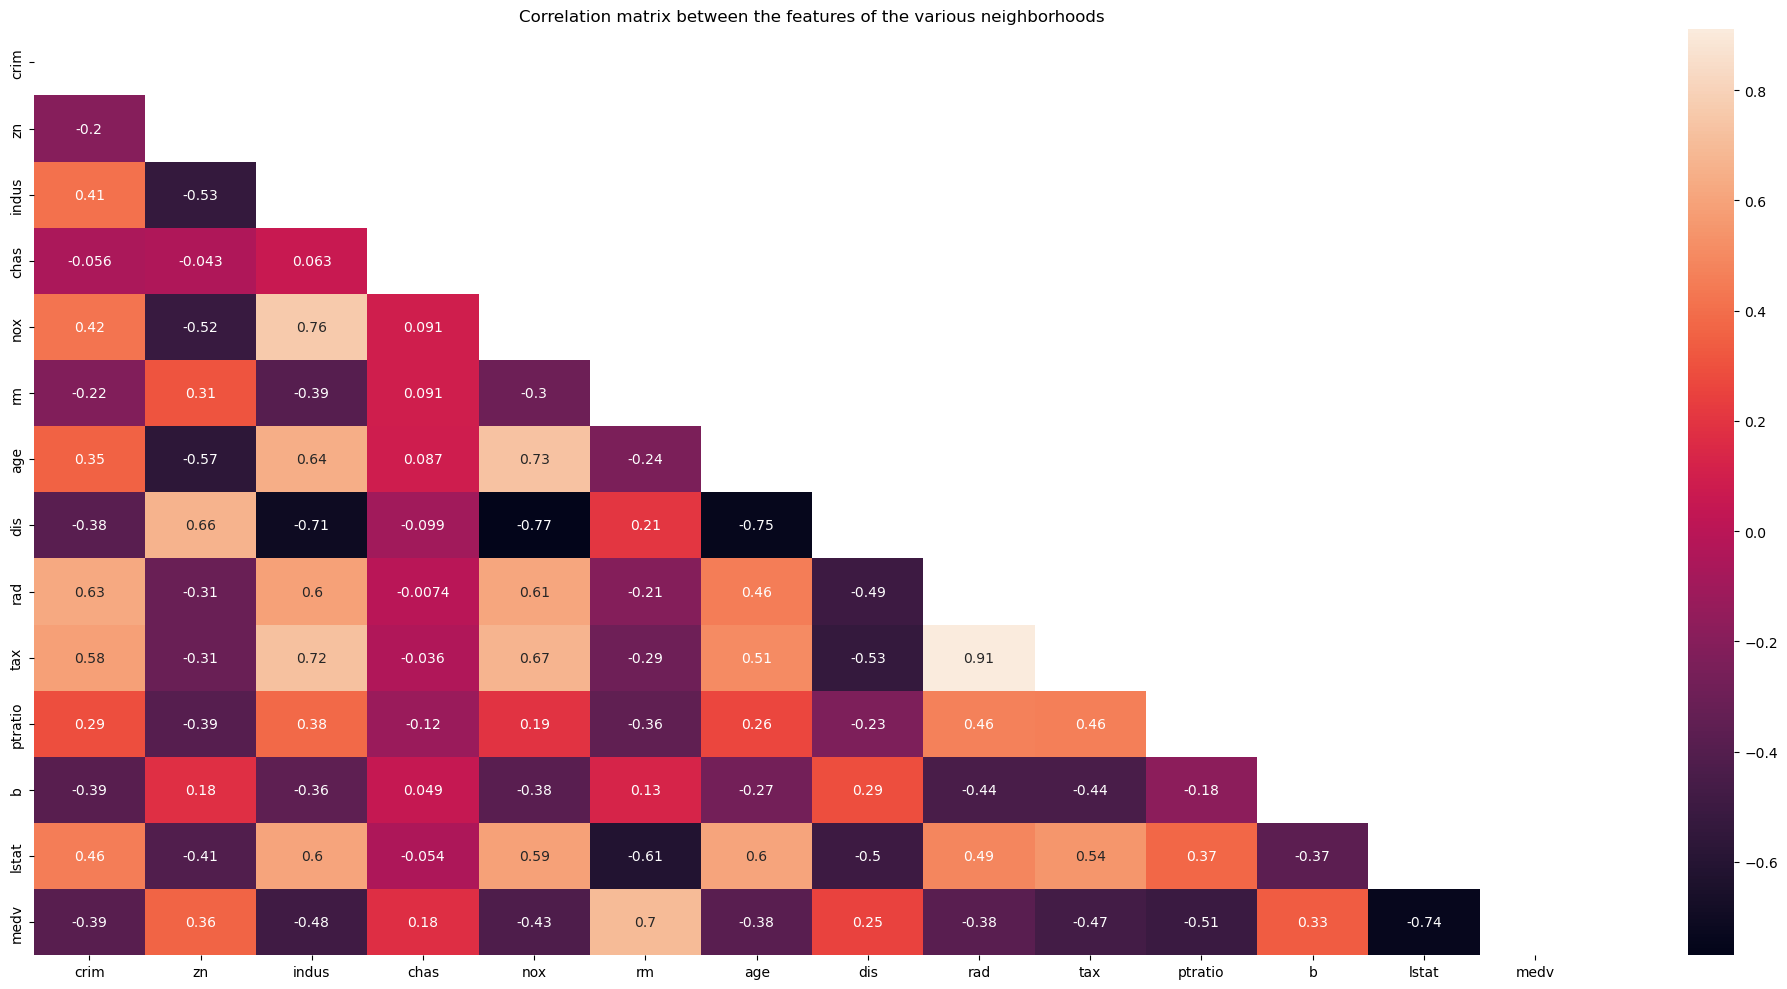

In [115]:
correlation_matrix = df_house.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool_))

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True)
plt.title('Correlation matrix between the features of the various neighborhoods')
plt.tight_layout()
plt.show()

Some of the most significant correlations identified from the matrix analysis are as follows:

- NOX and INDUS
- MEDV and RM
- TAX and RAD

Among these, the correlation between TAX (property tax rate) and RAD (index of accessibility to highways) is the strongest. Therefore, we will begin our in-depth analysis by focusing on this specific relationship.

**TAX and RAD correlation**

In [85]:
high_tax = df_house.loc[df_house['tax'] > 500]

high_tax.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
356,8.98296,0.0,18.1,1,0.77,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8
357,3.84970,0.0,18.1,1,0.77,6.395,91.0,2.5052,24,666,20.2,391.34,13.27,21.7
358,5.20177,0.0,18.1,1,0.77,6.127,83.4,2.7227,24,666,20.2,395.43,11.48,22.7
359,4.26131,0.0,18.1,0,0.77,6.112,81.3,2.5091,24,666,20.2,390.74,12.67,22.6
360,4.54192,0.0,18.1,0,0.77,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0


array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'b'}>],
       [<Axes: title={'center': 'lstat'}>,
        <Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >]],
      dtype=object)

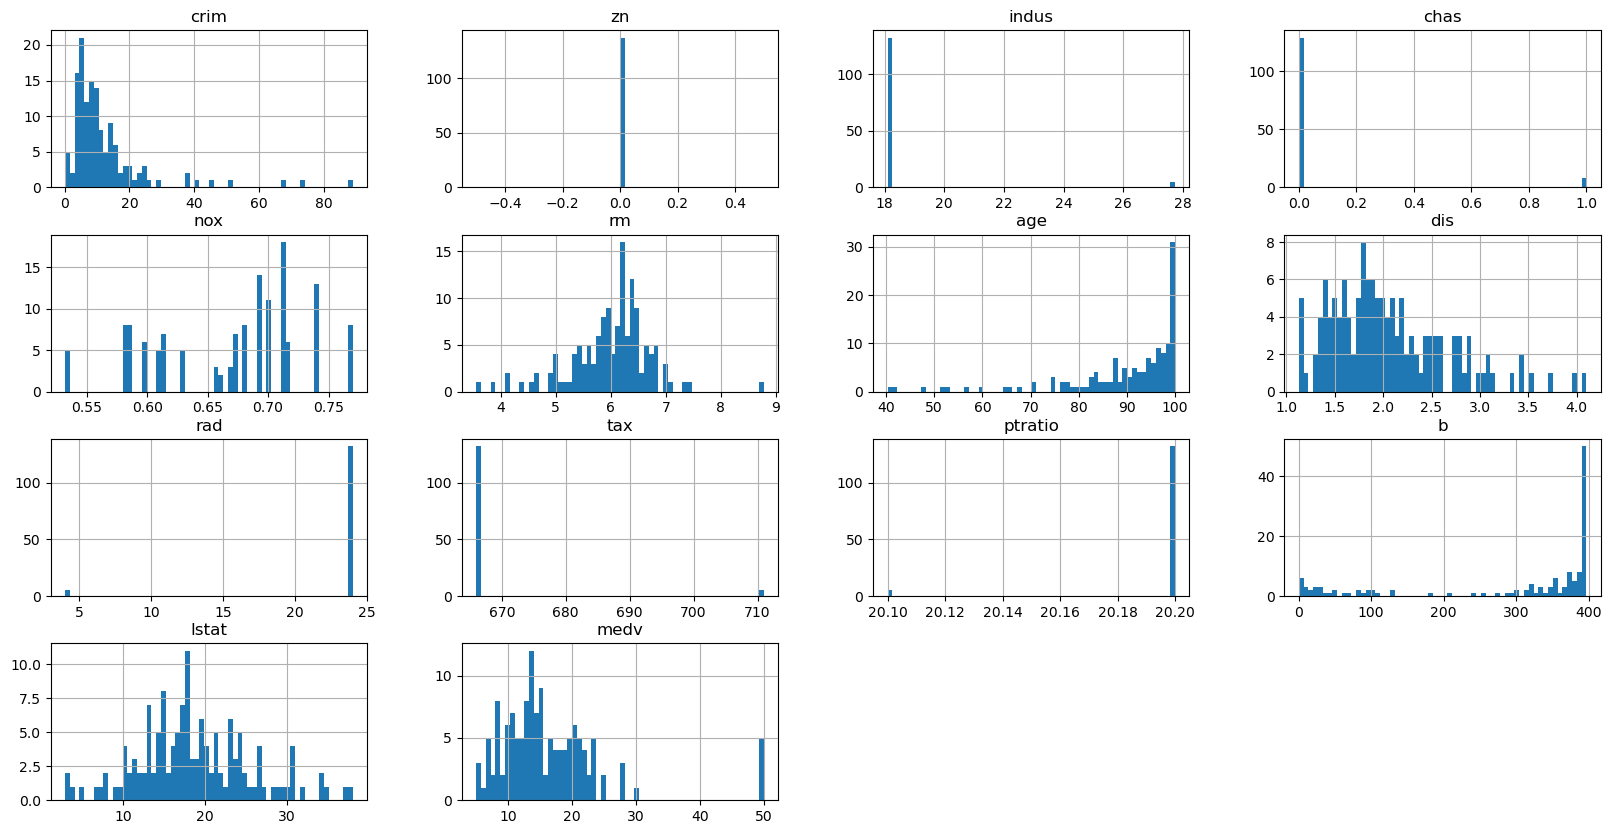

In [86]:
high_tax.hist(figsize=(20, 10), bins=60)

The two most noteworthy features in terms of unusual values are certainly INDUS and RAD, both of which show distinct outliers. These anomalies may reflect particular urban planning scenarios or boundary cases within the city. Let us delve deeper into the analysis to better understand what these outliers can reveal about the area and the distribution of infrastructure.

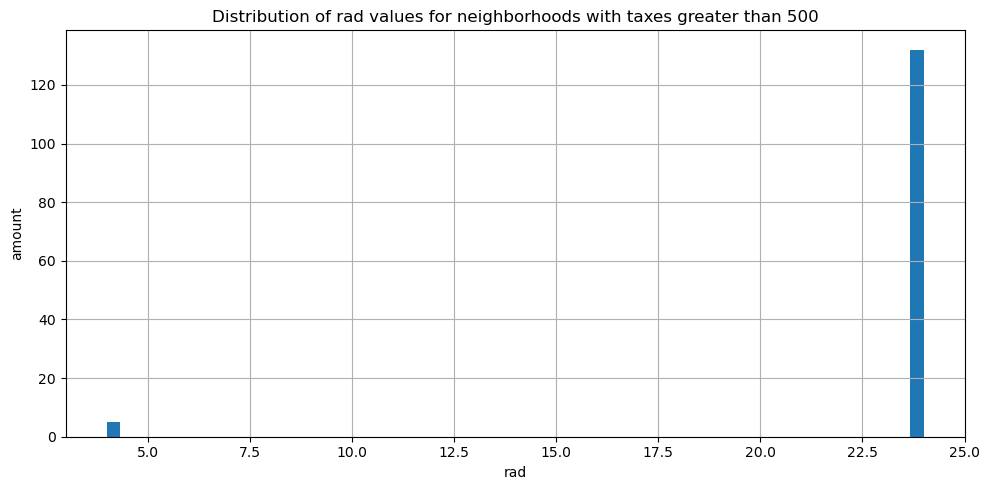

In [87]:
high_tax['rad'].hist(figsize=(10, 5), bins=60)
plt.title('Distribution of rad values for neighborhoods with taxes greater than 500')
plt.xlabel('rad')
plt.ylabel('amount')
plt.tight_layout()
plt.show()

In [88]:
high_tax.value_counts('rad')

rad
24    132
4       5
dtype: int64

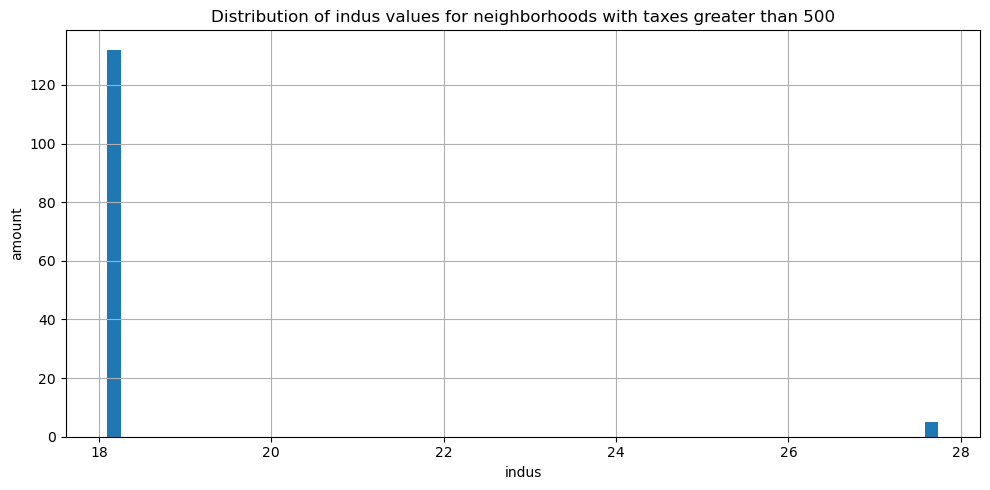

In [89]:
high_tax['indus'].hist(figsize=(10, 5), bins=60)
plt.title('Distribution of indus values for neighborhoods with taxes greater than 500')
plt.xlabel('indus')
plt.ylabel('amount')
plt.tight_layout()
plt.show()

In [90]:
high_tax.value_counts('indus')

indus
18.10    132
27.74      5
dtype: int64

In [91]:
high_tax.loc[high_tax['rad'] == 4]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
488,0.15086,0.0,27.74,0,0.609,5.454,92.7,1.8209,4,711,20.1,395.09,18.06,15.2
489,0.18337,0.0,27.74,0,0.609,5.414,98.3,1.7554,4,711,20.1,344.05,23.97,7.0
490,0.20746,0.0,27.74,0,0.609,5.093,98.0,1.8226,4,711,20.1,318.43,29.68,8.1
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711,20.1,396.90,13.35,20.1


As we can see, the five records exhibiting outlier behavior in both INDUS and RAD correspond to the same suburbs. This indicates a structural relationship between a high percentage of industrial land use and strong accessibility to highways in these specific areas.

In [92]:
mean_dis = high_tax.loc[high_tax['rad'] == 4]['dis'].mean()

print(f'The average distance from a work center (RAD 4) is: {mean_dis}')

The average distance from a work center (RAD 4) is: 1.8753799999999998


In [93]:
mean_dis = high_tax.loc[high_tax['rad'] == 24]['dis'].mean()

print(f'The average distance from a work center (RAD 24) is: {mean_dis}')

The average distance from a work center (RAD 24) is: 2.061253787878788


It can be observed that the only significant difference among neighborhoods with a RAD index of 4 lies in their distance from employment centers (DIS). It is likely that, being closer to the city center, they are somewhat farther from highways, which contributes to a lower RAD value—despite still being affluent neighborhoods.

This hypothesis is further supported by the fact that these records exhibit higher values of INDUS, indicating that these areas most likely host industrial or commercial establishments.

**NOX and INDUS correlation**

Let's analys now the correlation between NOX and INDUS values.

In [94]:
high_nox = df_house.loc[df_house['nox'] >= 0.7].reset_index(drop=True)
low_nox = df_house.loc[df_house['nox'] < 0.7].reset_index(drop=True)

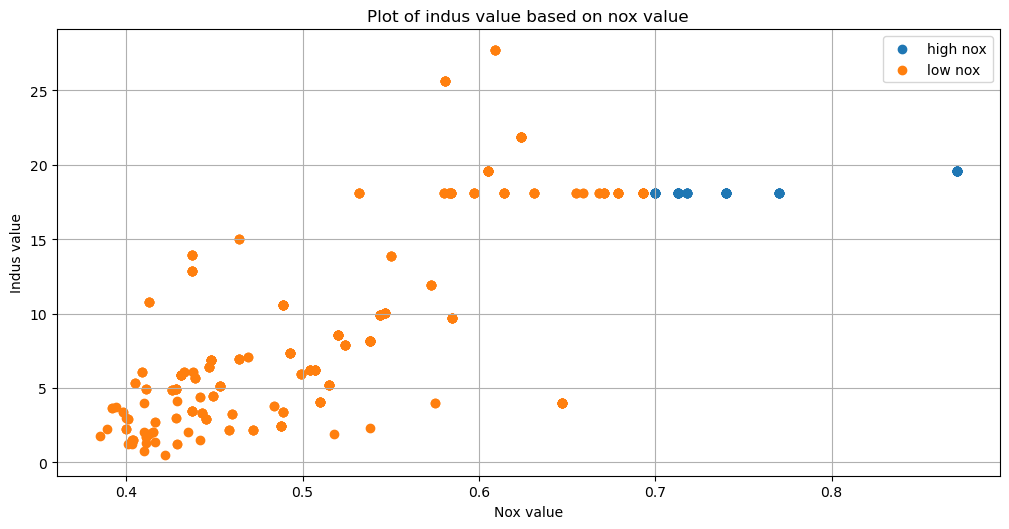

In [95]:
plt.figure(figsize=(10, 5))
plt.scatter(x=high_nox['nox'], y=high_nox['indus'], label='high nox')
plt.scatter(x=low_nox['nox'], y=low_nox['indus'], label='low nox')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.title('Plot of indus value based on nox value')
plt.xlabel('Nox value')
plt.ylabel('Indus value')
plt.show()

In [96]:
mean_high_nox_indus = high_nox['indus'].mean()
mean_low_nox_indus = low_nox['indus'].mean()

print(f'The average value of inuds in areas with high NOX: {mean_high_nox_indus}')
print(f'The average value of indus in areas with low NOX: {mean_low_nox_indus}')

The average value of inuds in areas with high NOX: 18.42888888888889
The average value of indus in areas with low NOX: 9.927027649769585


As clearly shown by the plot above and the recently calculated average values, areas with a high INDUS value (land used for industrial purposes) also exhibit higher levels of NOX (nitric oxides) in the air. This leads to the assumption that these neighborhoods are less desirable from a residential perspective and therefore harder to sell. Consequently, it is reasonable to hypothesize that property values in these areas are lower. Let us now proceed to verify this assumption.

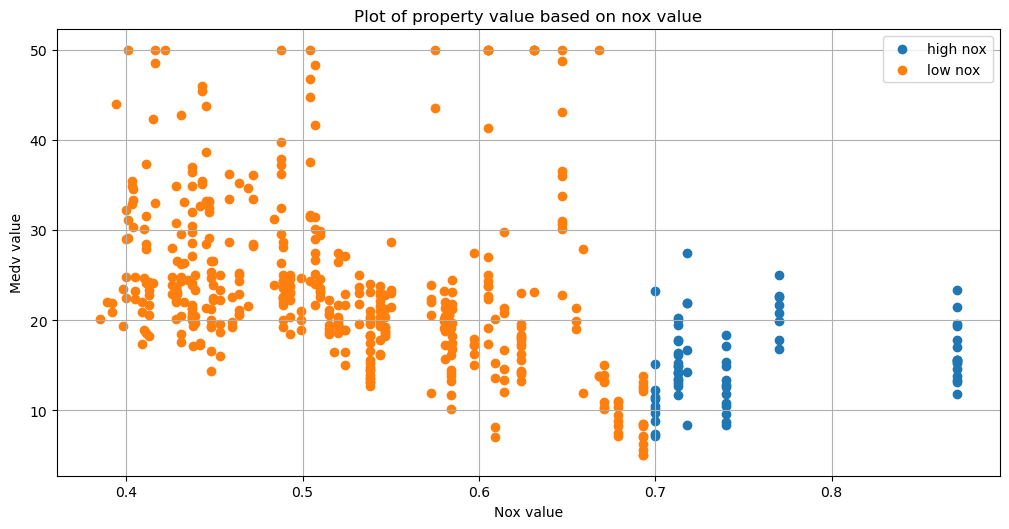

In [97]:
plt.figure(figsize=(10, 5))
plt.scatter(x=high_nox['nox'], y=high_nox['medv'], label='high nox')
plt.scatter(x=low_nox['nox'], y=low_nox['medv'], label='low nox')
plt.tight_layout()
plt.legend()
plt.grid(True)
plt.title('Plot of property value based on nox value')
plt.xlabel('Nox value')
plt.ylabel('Medv value')
plt.show()

In [98]:
mean_high_nox = high_nox['medv'].mean()
mean_low_nox = low_nox['medv'].mean()

print(f'The average value of properties in areas with high NOX: {mean_high_nox}')
print(f'The average value of properties in areas with low NOX: {mean_low_nox}')

The average value of properties in areas with high NOX: 15.441666666666666
The average value of properties in areas with low NOX: 23.70921658986175


As expected, in areas with high NOX levels and a significant concentration of industrial land use (INDUS), the average property price is noticeably lower compared to neighborhoods with better air quality. This confirms the hypothesis that air pollution and land use planning have a negative impact on real estate value.

**MEDV and RM correlation**

As one might expect, the number of rooms in a property (RM) is strongly correlated with its value (MEDV). To confirm this relationship, we will now create a plot that highlights the correlation between these two variables.

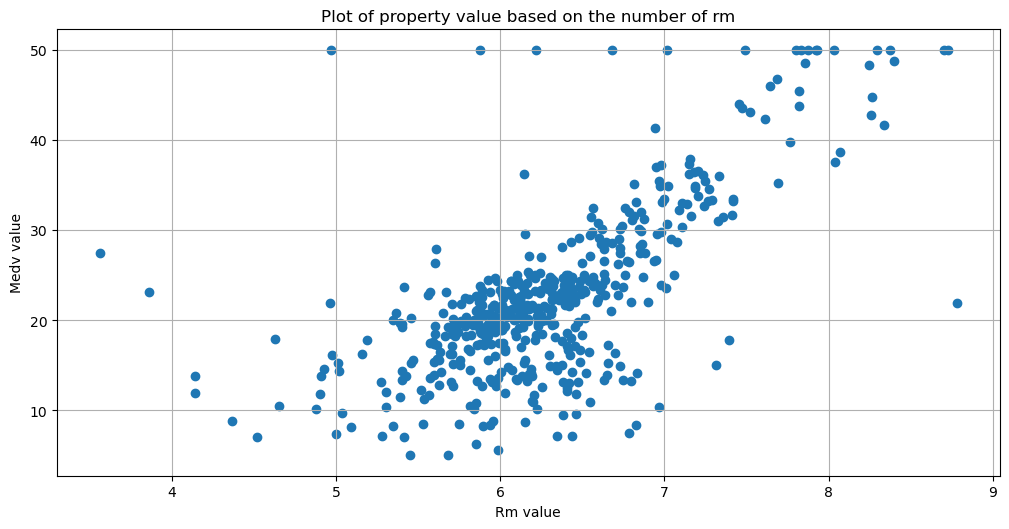

In [99]:
plt.figure(figsize=(10, 5))
plt.scatter(x=df_house['rm'], y=df_house['medv'])
plt.tight_layout()
plt.grid(True)
plt.title('Plot of property value based on the number of rm')
plt.xlabel('Rm value')
plt.ylabel('Medv value')
plt.show()

Although there are always some exceptions, there is generally a clear direct proportionality between the average number of rooms per dwelling (RM) and the median property value (MEDV). This supports the notion that larger homes tend to have a higher market value.

# Benchmark model

We will now attempt to predict property values (MEDV) using various regression models. The goal is to compare their performance and identify the model that yields the most accurate predictions.

In [100]:
df_house_bench = df_house.copy()

In [101]:
input_feature = df_house_bench.columns.delete(-1)
target_feature = 'medv'

In [102]:
from sklearn.model_selection import train_test_split

X_bench = df_house_bench[input_feature]
y_bench = df_house_bench[target_feature]

X_train, X_test, y_train, y_test = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

**Linear Regression**

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_pred=y_pred, y_true=y_test)}')
print(f'Root Mean Squared Error: {mean_squared_error(y_pred=y_pred, y_true=y_test) ** 0.5}')
print(f'R2 score: {r2_score(y_pred=y_pred, y_true=y_test)}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}')

Mean Squared Error: 20.724023437339845
Root Mean Squared Error: 4.552364598463072
R2 score: 0.7261570836552464
Mean Absolute Percentage Error: 0.16132080638597543


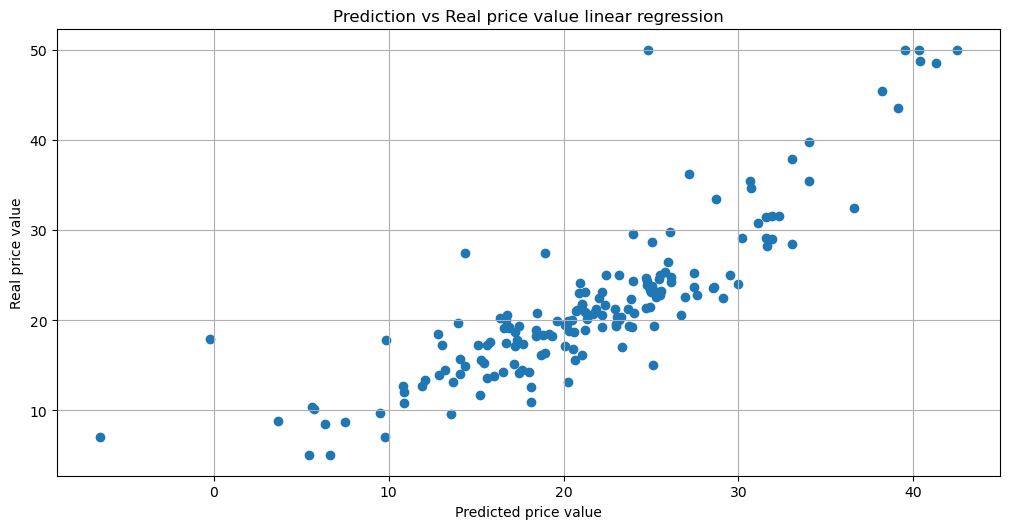

In [104]:
plt.figure(figsize=(10, 5))
plt.scatter(x=y_pred, y=y_test)
plt.tight_layout()
plt.grid(True)
plt.title('Prediction vs Real price value linear regression')
plt.xlabel('Predicted price value')
plt.ylabel('Real price value')
plt.show()

**Decision Tree**

In [105]:
from sklearn.tree import DecisionTreeRegressor 

tree = DecisionTreeRegressor(max_depth=15)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_pred=y_pred, y_true=y_test)}')
print(f'Root Mean Squared Error: {mean_squared_error(y_pred=y_pred, y_true=y_test) ** 0.5}')
print(f'R2 score: {r2_score(y_pred=y_pred, y_true=y_test)}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}')

Mean Squared Error: 19.550938332838452
Root Mean Squared Error: 4.4216443019354745
R2 score: 0.7416579851625498
Mean Absolute Percentage Error: 0.1482235229713294


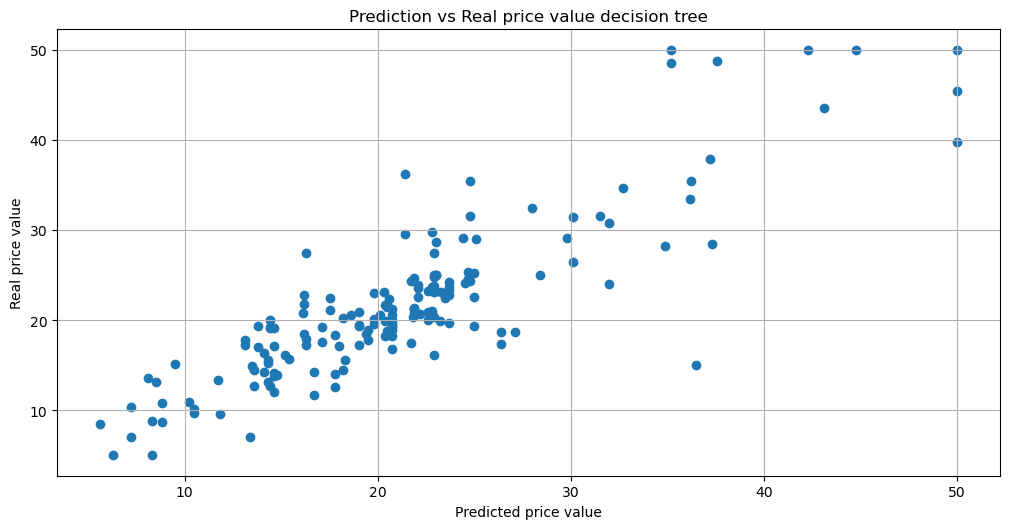

In [106]:
plt.figure(figsize=(10, 5))
plt.scatter(x=y_pred, y=y_test)
plt.tight_layout()
plt.grid(True)
plt.title('Prediction vs Real price value decision tree')
plt.xlabel('Predicted price value')
plt.ylabel('Real price value')
plt.show()

**Support Vector Machines**

In [107]:
from sklearn.svm import SVR 

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_pred=y_pred, y_true=y_test)}')
print(f'Root Mean Squared Error: {mean_squared_error(y_pred=y_pred, y_true=y_test) ** 0.5}')
print(f'R2 score: {r2_score(y_pred=y_pred, y_true=y_test)}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}')

Mean Squared Error: 54.965948517255114
Root Mean Squared Error: 7.4139023811522575
R2 score: 0.2736914389654437
Mean Absolute Percentage Error: 0.2364031160021988


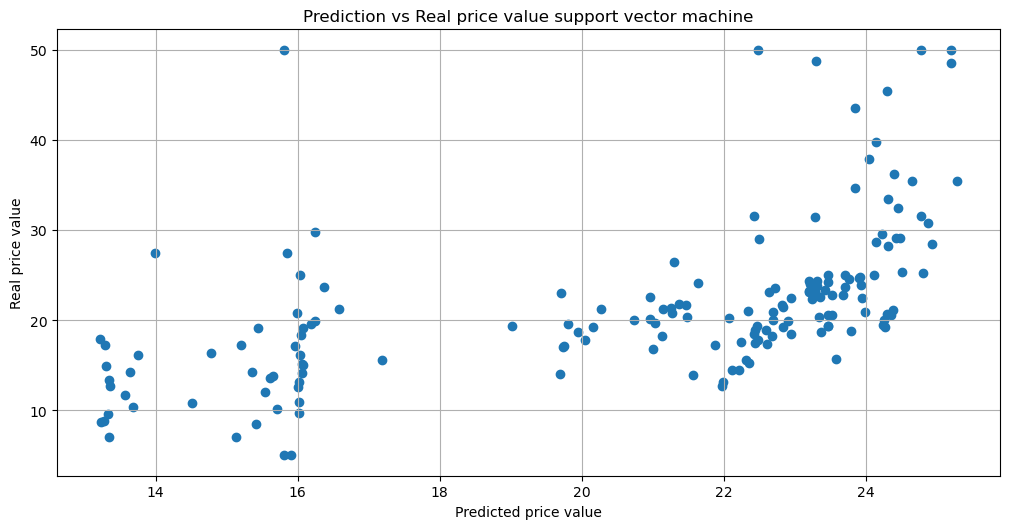

In [108]:
plt.figure(figsize=(10, 5))
plt.scatter(x=y_pred, y=y_test)
plt.tight_layout()
plt.grid(True)
plt.title('Prediction vs Real price value support vector machine')
plt.xlabel('Predicted price value')
plt.ylabel('Real price value')
plt.show()

As we have observed, the Decision Tree model performs the best among those tested. We will now explore whether its performance can be further improved through targeted feature selection. We will use the VIF (Variance Inflation Factor) as our reference metric. This indicator helps identify variables with high multicollinearity—features that are highly correlated with others and thus provide redundant information.

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df['feature'] = df_house_bench[input_feature].columns

vif_df["VIF"] = [variance_inflation_factor(df_house_bench[input_feature].values, i)
                          for i in range(len(df_house_bench[input_feature].columns))]

print(vif_df)

    feature        VIF
0      crim   2.100373
1        zn   2.844013
2     indus  14.485758
3      chas   1.152952
4       nox  73.894947
5        rm  77.948283
6       age  21.386850
7       dis  14.699652
8       rad  15.167725
9       tax  61.227274
10  ptratio  85.029547
11        b  20.104943
12    lstat  11.102025


The correlation values indicate a strong redundancy among certain features in the dataset. In particular, the following high correlations are observed:

- NOX and INDUS: 0.76
- AGE and NOX: 0.73
- TAX and INDUS: 0.72
- TAX and RAD: 0.91

These correlations, along with the VIF (Variance Inflation Factor) values, suggest the presence of multicollinearity, which could negatively impact the model's performance. To reduce this redundancy, we can remove NOX and TAX, as they exhibit both high correlations with other features and elevated VIF values. We will now retrain the model to assess whether this simplification leads to improved performance.

In [110]:
df_house_bench_after_analysis = df_house.copy()

In [111]:
input_feature = df_house_bench_after_analysis.columns.delete([4, 9, -1])
target_feature = 'medv'

In [112]:
X_bench = df_house_bench_after_analysis[input_feature]
y_bench = df_house_bench_after_analysis[target_feature]

X_train, X_test, y_train, y_test = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

In [113]:
tree = DecisionTreeRegressor(max_depth=15)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_pred=y_pred, y_true=y_test)}')
print(f'Root Mean Squared Error: {mean_squared_error(y_pred=y_pred, y_true=y_test) ** 0.5}')
print(f'R2 score: {r2_score(y_pred=y_pred, y_true=y_test)}')
print(f'Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred)}')

Mean Squared Error: 18.73183653643127
Root Mean Squared Error: 4.328029174628017
R2 score: 0.75248142518565
Mean Absolute Percentage Error: 0.15883771112071593


As we can see, despite the removal of redundant features, the performance of our model has not changed significantly. This likely indicates that the Decision Tree has reached its performance plateau. In other words, the model has already learned as much as it can from the available data, and further adjustments to the feature set do not yield meaningful improvements in predictive accuracy.